### features:
* spectogram coef
* zero crossing rate
* chromogram
* tempogram
* wavelet of level 0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError
import itertools

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
csv_path = "/Users/ecem/Desktop/csv of scgs"
wavelet_csv = "/Users/ecem/Desktop/wavelet-csv"

## Load data

Here, our target is to predict disease correctly. So; our y will be disease column of  dataset

In [3]:
spec = pd.read_csv(csv_path + '/spectogram_coef.csv', index_col = 0)
y = spec.disease

In [4]:
spec = spec.drop(['disease'], axis =1)
#spec  #uncomment to see dataframe
s_p = pd.read_csv(csv_path + '/signal_processing.csv', index_col = 0).drop(['disease'], axis =1)
#s_p  #uncomment to see dataframe
w_lvl0 = pd.read_csv(wavelet_csv + '/wavelet_lvl0.csv', index_col = 0).drop(['disease'], axis =1)
#w_lvl0  #uncomment to see dataframe

In [5]:
features = pd.concat([spec, s_p], axis = 1)
features = pd.concat([features, w_lvl0], axis = 1)

features

,freq_x0,freq_y0,freq_z0,freq_x1,freq_y1,freq_z1,freq_x2,freq_y2,freq_z2,freq_x3,...,lvl0_z38,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47
0,0.000462,0.000658,0.000667,0.000676,0.000683,0.000685,0.000687,0.000686,0.000687,0.000691,...,-0.004803,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062
1,0.000359,0.000513,0.000522,0.000531,0.000538,0.000542,0.000546,0.000552,0.000559,0.000569,...,-0.056027,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950
2,0.000467,0.000674,0.000698,0.000725,0.000752,0.000779,0.000804,0.000824,0.000837,0.000841,...,0.017353,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143
3,0.000422,0.000606,0.000621,0.000636,0.000647,0.000654,0.000656,0.000653,0.000646,0.000641,...,0.052188,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573
4,0.000379,0.000540,0.000547,0.000553,0.000556,0.000557,0.000559,0.000569,0.000589,0.000613,...,-0.014478,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.000403,0.000578,0.000591,0.000604,0.000617,0.000630,0.000643,0.000656,0.000671,0.000685,...,0.014821,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180
1458,0.000512,0.000735,0.000751,0.000764,0.000772,0.000775,0.000775,0.000776,0.000778,0.000781,...,0.006079,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637
1459,0.000596,0.000844,0.000843,0.000836,0.000823,0.000803,0.000778,0.000751,0.000722,0.000694,...,-0.026788,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539
1460,0.000465,0.000663,0.000672,0.000678,0.000682,0.000682,0.000685,0.000688,0.000690,0.000695,...,-0.055060,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([2, 2, 2, ..., 1, 1, 1])

In [7]:
list(le.classes_)

['AR', 'AS', 'MR', 'MS']

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(features, y_encoded, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [9]:
import xgboost as xgb

model = xgb.XGBClassifier(random_state = 42, eval_metric="auc",objective = 'multi:softprob')

# Fit the model
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [10]:
predictions = model.predict(X_valid)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.64%


In [12]:
recall = recall_score(y_valid, predictions, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

recall: 84.64%


In [13]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid, predictions, average='weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 85.14%


In [14]:
classes = ['AR', 'AS', 'MR', 'MS']

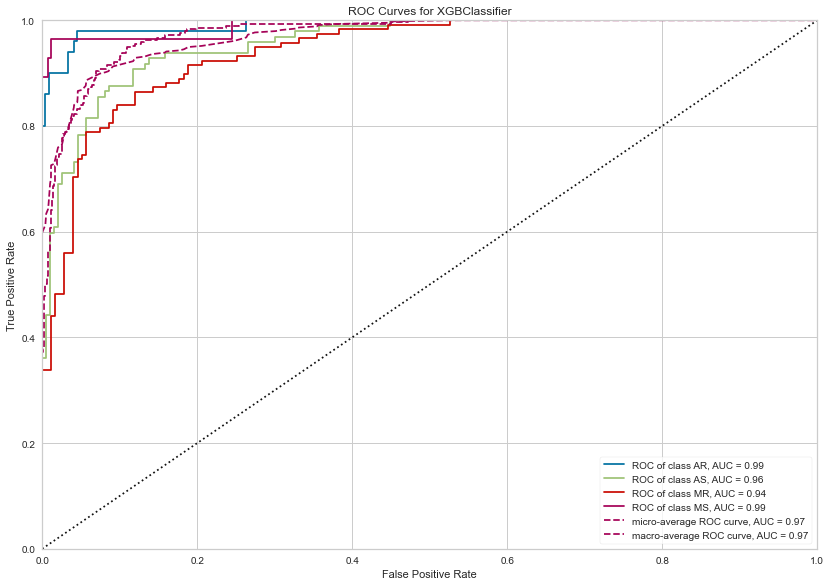

In [15]:
rocauc = ROCAUC(model, size=(1000, 700), classes=classes)

rocauc.fit(X_train, y_train)       
rocauc.score(X_valid, y_valid)  
r = rocauc.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


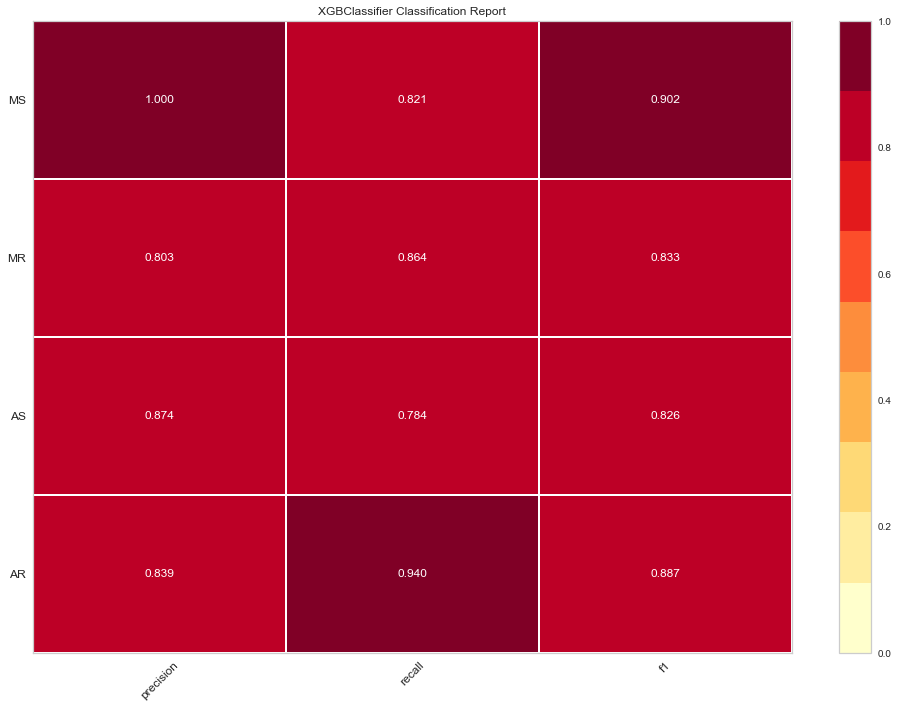

In [16]:
report = ClassificationReport(model, size=(1000, 720), classes=classes)

report.score(X_valid, y_valid)
c = report.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


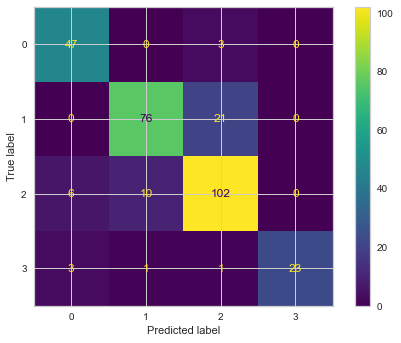

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_valid, y_valid)  
plt.show()

## Varience Thresholding

### with 0.001 variation

In [18]:
from sklearn.feature_selection import VarianceThreshold


In [19]:
features.var()

freq_x0     4.726084e-07
freq_y0     9.533120e-07
freq_z0     9.670360e-07
freq_x1     9.797167e-07
freq_y1     9.886805e-07
                ...     
lvl0_z43    4.866746e+01
lvl0_z44    5.218181e+01
lvl0_z45    5.057221e+01
lvl0_z46    5.059073e+01
lvl0_z47    5.075329e+01
Length: 7497, dtype: float64

In [20]:
 features.var().mean()

14.159812801430755

In [21]:
vt = VarianceThreshold(threshold = 0.001)

In [22]:
_ = vt.fit(features)
masked = vt.get_support()
features_thres = features.loc[:, masked]
features_thres #uncomment to see dataframe

,freq_z668,freq_x669,freq_y669,freq_z669,freq_x670,freq_y670,freq_z670,freq_x671,freq_y671,freq_z671,...,lvl0_z38,lvl0_z39,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47
0,0.005081,0.005250,0.005415,0.005550,0.005640,0.005678,0.005666,0.005595,0.005459,0.005257,...,-0.004803,-0.009975,-0.013297,0.031506,0.034660,0.121152,0.158909,0.128339,0.134332,0.149062
1,0.003412,0.003699,0.004014,0.004320,0.004581,0.004776,0.004890,0.004913,0.004844,0.004685,...,-0.056027,-0.044484,-0.025730,0.040819,-0.007631,-0.004883,-0.056402,-0.067213,-0.057641,-0.039950
2,0.003474,0.003777,0.004078,0.004349,0.004568,0.004718,0.004789,0.004775,0.004676,0.004497,...,0.017353,0.029110,0.004084,-0.041428,-0.044852,-0.034972,0.053526,0.039660,0.035398,0.031143
3,0.004701,0.005080,0.005414,0.005683,0.005885,0.006011,0.006035,0.005953,0.005768,0.005488,...,0.052188,-0.078633,-0.044265,-0.024217,-0.029692,0.051737,0.043672,0.048377,0.047015,0.038573
4,0.005664,0.006155,0.006560,0.006860,0.007037,0.007083,0.006996,0.006780,0.006447,0.006014,...,-0.014478,0.017597,-0.019702,-0.037006,0.019880,0.066369,0.091973,0.078102,0.079841,0.083903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0.008095,0.008221,0.008233,0.008131,0.007924,0.007628,0.007258,0.006837,0.006388,0.005934,...,0.014821,0.009703,0.038727,0.016893,0.051154,0.023889,0.014518,0.018233,0.018315,0.018180
1458,0.007280,0.007724,0.008072,0.008305,0.008411,0.008386,0.008238,0.007996,0.007687,0.007317,...,0.006079,-0.028282,-0.056236,-0.020658,-0.042306,-0.025261,0.045890,0.026822,0.025429,0.030637
1459,0.006789,0.007204,0.007567,0.007854,0.008037,0.008103,0.008049,0.007877,0.007600,0.007236,...,-0.026788,-0.088121,-0.051529,-0.048913,-0.070555,-0.049824,-0.080925,-0.069791,-0.070239,-0.077539
1460,0.005972,0.006358,0.006708,0.007019,0.007270,0.007450,0.007581,0.007638,0.007607,0.007482,...,-0.055060,-0.042704,-0.035764,-0.022767,0.005606,0.042350,0.034094,0.036432,0.035644,0.033274


In [23]:
X_train_t, X_valid_t, y_train_t, y_valid_t = train_test_split(features_thres, y_encoded, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [24]:
model_var = xgb.XGBClassifier(random_state = 42)

# Fit the model
model_var.fit(X_train_t, y_train_t)



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [25]:
predictions_t = model_var.predict(X_valid_t)

In [26]:
accuracy_var = accuracy_score(y_valid_t, predictions_t)
print("Accuracy: %.2f%%" % (accuracy_var * 100.0))

Accuracy: 84.30%


In [27]:
recall_t = recall_score(y_valid_t, predictions_t, average= 'weighted')
print("recall: %.2f%%" % (recall_t * 100.0))

from sklearn.metrics import precision_score
precision_t = precision_score(y_valid_t, predictions_t, average= 'weighted')
print("precision: %.2f%%" % (precision_t * 100.0))

recall: 84.30%
precision: 84.79%


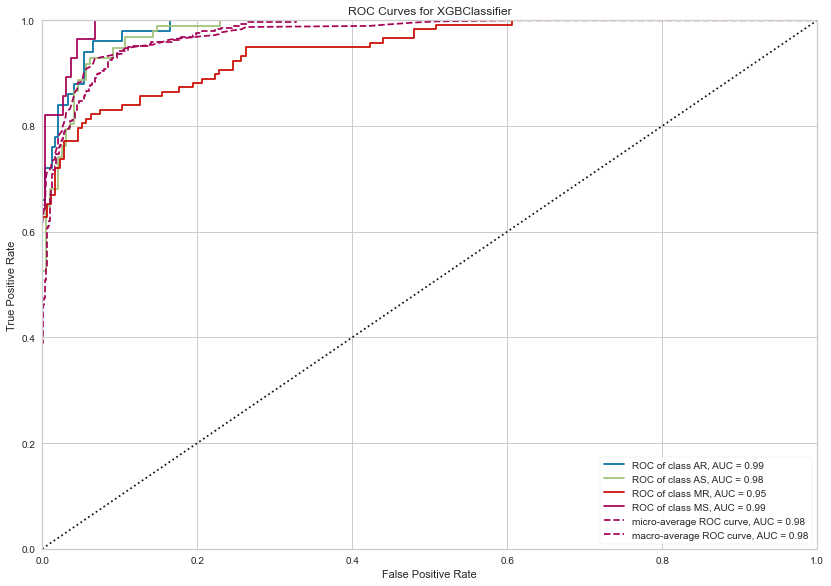

In [28]:
rocauc_t = ROCAUC(model_var, size=(1000, 700), classes=classes)

rocauc_t.fit(X_train_t, y_train_t)       
rocauc_t.score(X_valid_t, y_valid_t)  
r_t = rocauc_t.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


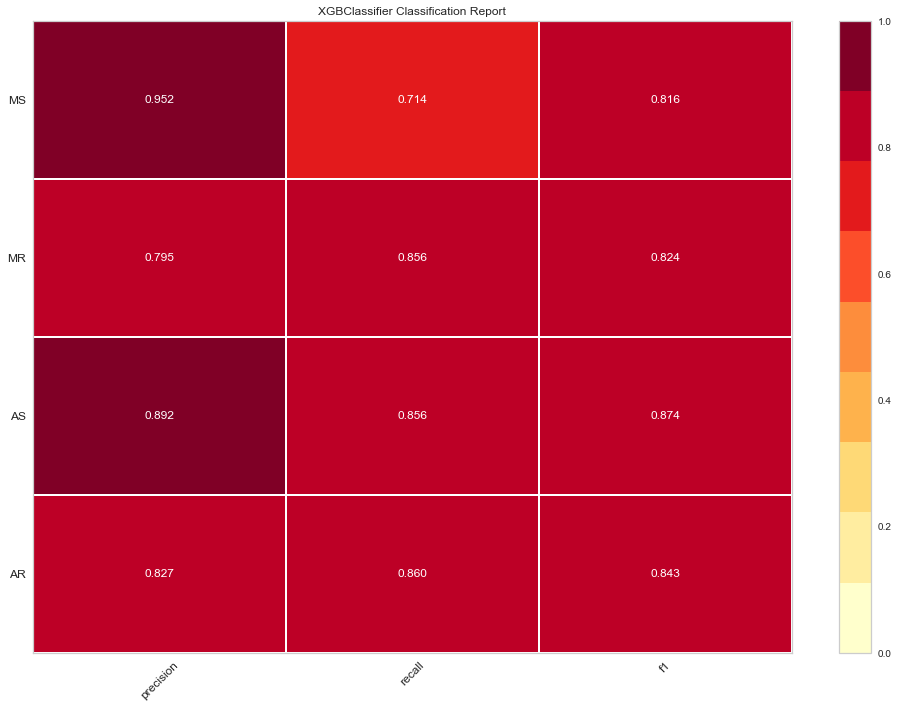

In [29]:
report_t = ClassificationReport(model_var, size=(1000, 720), classes=classes)

report_t.score(X_valid_t, y_valid_t)
c_t = report_t.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


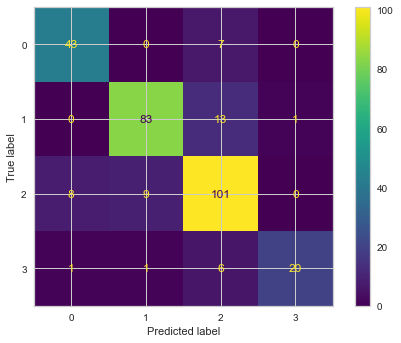

In [30]:
plot_confusion_matrix(model_var, X_valid_t, y_valid_t)  
plt.show()

### with 0.01 variation

In [31]:
vt_01 = VarianceThreshold(threshold = 0.01)

In [32]:
_ = vt_01.fit(features)
masked_01 = vt_01.get_support()
features_01 = features.loc[:, masked_01]
#features_01 # uncomment to see the dataframe

In [33]:
X_train_01, X_valid_01, y_train_01, y_valid_01 = train_test_split(features_01, y_encoded, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [34]:
model_01  = xgb.XGBClassifier(random_state = 42) 

# Fit the model
model_01.fit(X_train_01, y_train_01)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [35]:
predictions_01 = model_01.predict(X_valid_01)

In [36]:
accuracy_01 = accuracy_score(y_valid_01, predictions_01)
print("Accuracy: %.2f%%" % (accuracy_01 * 100.0))

Accuracy: 87.03%


In [37]:
recall_01 = recall_score(y_valid_01, predictions_01, average= 'weighted')
print("recall: %.2f%%" % (recall_t * 100.0))

from sklearn.metrics import precision_score
precision_01 = precision_score(y_valid_01, predictions_01, average= 'weighted')
print("precision: %.2f%%" % (precision_01 * 100.0))

recall: 84.30%
precision: 87.61%


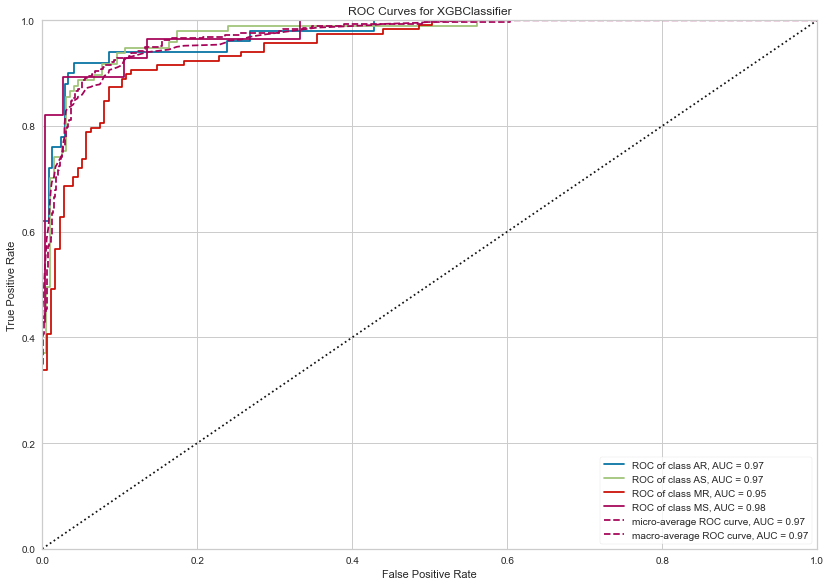

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


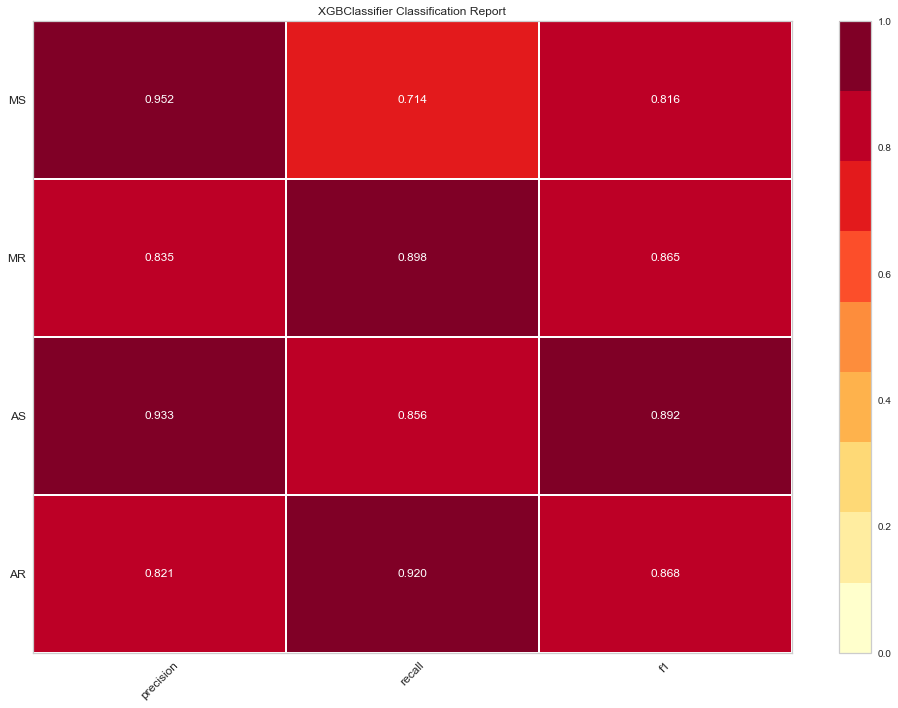

In [38]:
rocauc_01 = ROCAUC(model_01, size=(1000, 700), classes=classes)

rocauc_01.fit(X_train_01, y_train_01)       
rocauc_01.score(X_valid_01, y_valid_01)  
r_01 = rocauc_01.poof()

report_01 = ClassificationReport(model_01, size=(1000, 720), classes=classes)

report_01.score(X_valid_01, y_valid_01)
c_01 = report_01.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


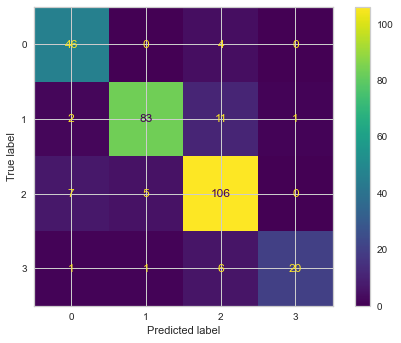

In [39]:
plot_confusion_matrix(model_01, X_valid_01, y_valid_01)  
plt.show()

### with 0.1 variation

In [40]:
vt_1 = VarianceThreshold(threshold = 0.1)

In [41]:
_ = vt_1.fit(features)
masked_1 = vt_1.get_support()
features_1 = features.loc[:, masked_1]
#features_1 # uncomment to see the dataframe

In [42]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(features_1, y_encoded, train_size=0.8, test_size=0.2,
                                                                )

In [43]:
model_1  = xgb.XGBClassifier() 

# Fit the model
model_1.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [44]:
predictions_1 = model_1.predict(X_valid_1)

In [45]:
accuracy_1 = accuracy_score(y_valid_1, predictions_1)
print("Accuracy: %.2f%%" % (accuracy_1 * 100.0))

Accuracy: 79.52%


In [46]:
recall_1 = recall_score(y_valid_1, predictions_1, average= 'weighted')
print("recall: %.2f%%" % (recall_1 * 100.0))

from sklearn.metrics import precision_score
precision_1 = precision_score(y_valid_1, predictions_1, average= 'weighted')
print("precision: %.2f%%" % (precision_1 * 100.0))

recall: 79.52%
precision: 79.78%


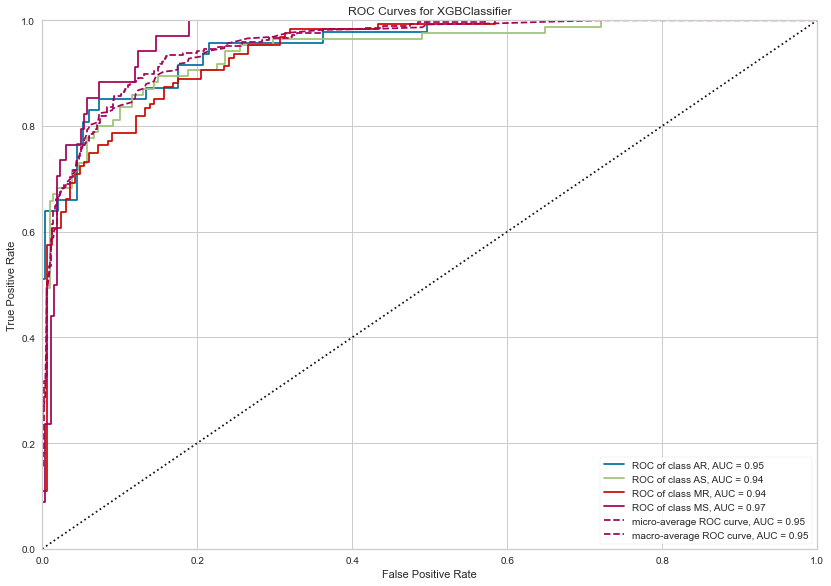

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


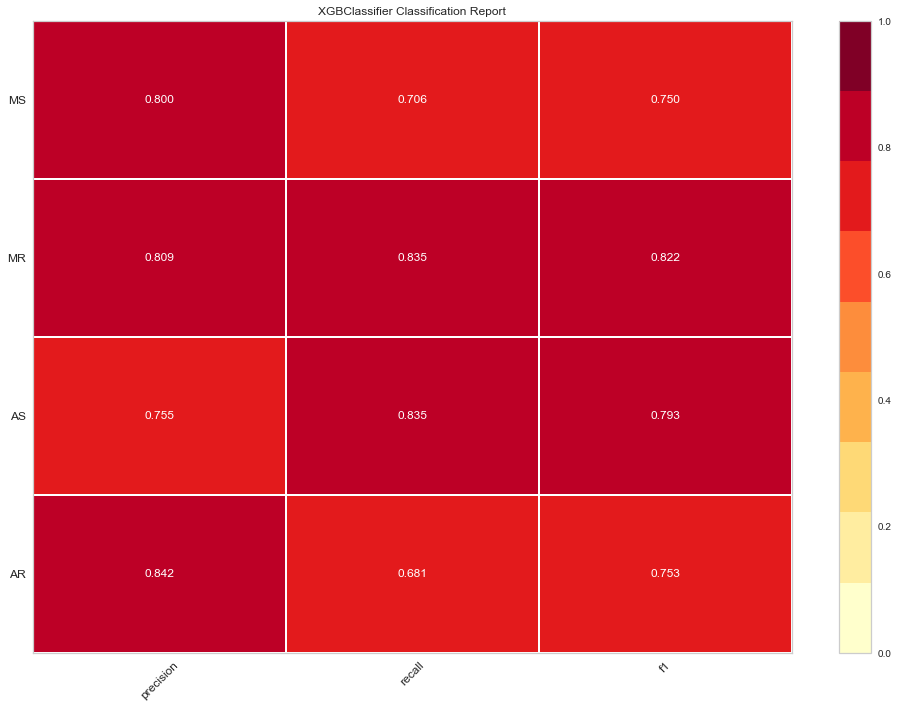

In [47]:
rocauc_1 = ROCAUC(model_1, size=(1000, 700), classes=classes)

rocauc_1.fit(X_train_1, y_train_1)       
rocauc_1.score(X_valid_1, y_valid_1)  
r_1 = rocauc_1.poof()

report_1 = ClassificationReport(model_1, size=(1000, 720), classes=classes)

report_1.score(X_valid_1, y_valid_1)
c_1 = report_1.poof()

/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


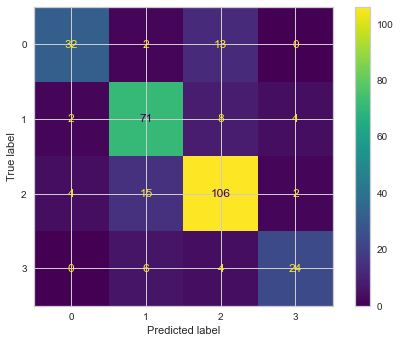

In [48]:
plot_confusion_matrix(model_1, X_valid_1, y_valid_1)  
plt.show()

In [49]:
df_val = pd.DataFrame({'actual': y_valid_1, 'predicted': predictions_1})
df_val

,actual,predicted
0,1,1
1,1,1
2,2,2
3,2,2
4,0,2
...,...,...
288,1,0
289,2,2
290,2,2
291,1,1
